## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plot
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.metrics import recall_score


In [6]:
# Importing the dataset
df1 = pd.read_csv(r'C:\Users\Shruthi Mrinalan\Downloads\students-data.csv',sep=';' )
df1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [7]:
# dropping null value columns to avoid errors  
df1.dropna(inplace = True)  
  
df1.index = df1.index.rename('number')
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [8]:
df1.select_dtypes(exclude=['int']).T

number,0,1,2,3,4,5,6,7,8,9,...,385,386,387,388,389,390,391,392,393,394
school,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,...,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS
sex,F,F,F,F,F,M,M,F,M,M,...,F,F,F,F,F,M,M,M,M,M
age,18,17,15,15,16,16,16,17,15,15,...,18,18,19,18,18,20,17,21,18,19
address,U,U,U,U,U,U,U,U,U,U,...,R,R,R,U,U,U,U,R,R,U
famsize,GT3,GT3,LE3,GT3,GT3,LE3,LE3,GT3,LE3,GT3,...,GT3,GT3,GT3,LE3,GT3,LE3,LE3,GT3,LE3,LE3
Pstatus,A,T,T,T,T,T,T,A,A,T,...,T,T,T,T,T,A,T,T,T,T
Medu,4,1,1,4,3,4,2,4,3,3,...,2,4,2,3,1,2,3,1,3,1
Fedu,4,1,1,2,3,3,2,4,2,4,...,2,4,3,1,1,2,1,1,2,1
Mjob,at_home,at_home,at_home,health,other,services,other,other,services,other,...,at_home,teacher,services,teacher,other,services,services,other,services,other
Fjob,teacher,other,other,services,other,other,other,teacher,other,other,...,other,at_home,other,services,other,services,services,other,other,at_home


In [9]:
# Classyfing pandas categorical columns
df1.describe(include=['O'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [10]:
#calulating variance of numerical independent variable
df1Copy = df1.select_dtypes(exclude=['object'])
df1Copy.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [11]:
#Checking Variance
df2 = pd.DataFrame([df1Copy.mean(), df1Copy.std(), df1Copy.var()], index=['Mean', 'Std. dev', 'Variance'])
df2

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
Std. dev,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
Variance,1.628285,1.198445,1.184180,0.486513,0.704324,0.553017,0.803997,0.997725,1.239388,0.793420,1.658678,1.932944,64.049541,11.017053,14.148917,20.989616


In [12]:
df1CopyDropped = df1Copy.drop(["traveltime", "studytime", "failures","famrel","Dalc",], axis=1)
df1CopyDropped.head()

,age,Medu,Fedu,freetime,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,
0,18,4,4,3,4,1,3,6,5,6,6
1,17,1,1,3,3,1,3,4,5,5,6
2,15,1,1,3,2,3,3,10,7,8,10
3,15,4,2,2,2,1,5,2,15,14,15
4,16,3,3,3,2,2,5,4,6,10,10


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [13]:

categoricalDataList = df1.select_dtypes(exclude=['float','int'])

for col_name in categoricalDataList.columns:
    if(categoricalDataList[col_name].dtype == 'object'):
        categoricalDataList[col_name]= categoricalDataList[col_name].astype('category')
        categoricalDataList[col_name] = categoricalDataList[col_name].cat.codes

In [14]:
categoricalDataList.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [15]:
# selecting rows based on condition 
df1CopyDropped['G1'] = np.where(df1CopyDropped['G1']>=10, 1, 0)
df1CopyDropped['G2'] = np.where(df1CopyDropped['G2']>=10, 1, 0)
df1CopyDropped['G3'] = np.where(df1CopyDropped['G3']>=10, 1, 0)
df1CopyDropped.head()

,age,Medu,Fedu,freetime,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,
0,18,4,4,3,4,1,3,6,0,0,0
1,17,1,1,3,3,1,3,4,0,0,0
2,15,1,1,3,2,3,3,10,0,0,1
3,15,4,2,2,2,1,5,2,1,1,1
4,16,3,3,3,2,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [16]:
y = df1CopyDropped['G3'] #Target
X = df1CopyDropped.drop(['G3'], axis = 1) #Feature/

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

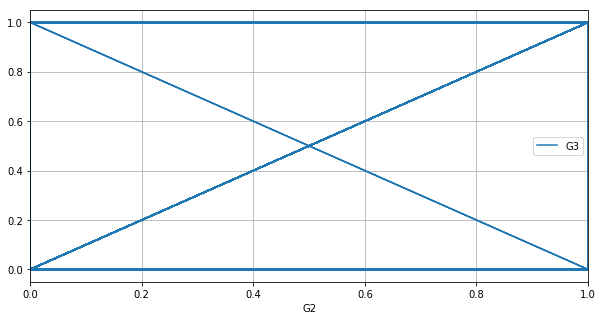

In [21]:
df1CopyDropped.plot(x='G2', y='G3' ,figsize=(10,5), grid=True )


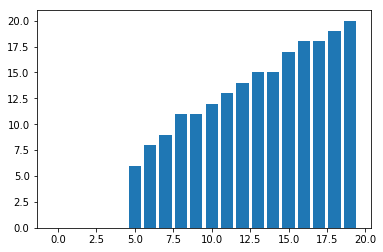

In [24]:
plt.bar(df1['G2'], df1['G3']) 
plt.show()

No handles with labels found to put in legend.


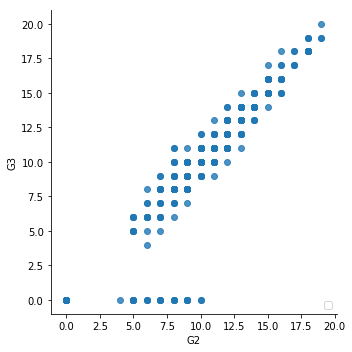

In [55]:
# library & dataset
import seaborn as sns
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="G2", y="G3", data=df1, fit_reg=False, legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()



The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

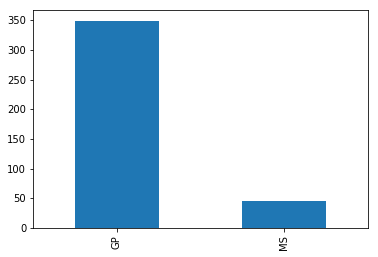

In [25]:
pd.value_counts(df1['school']).plot.bar()

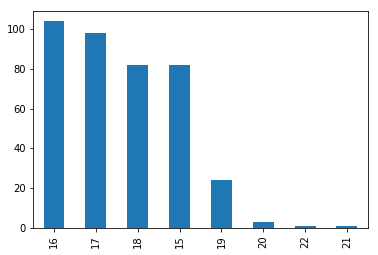

In [26]:
pd.value_counts(df1['age']).plot.bar()

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [27]:
records = categoricalDataList.iloc[:300]
y = records['romantic']
X = records.drop(['romantic'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)#

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print('Accuracy',model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

Accuracy 0.6
[[50 12]
 [24  4]]
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        62
           1       0.25      0.14      0.18        28

   micro avg       0.60      0.60      0.60        90
   macro avg       0.46      0.47      0.46        90
weighted avg       0.54      0.60      0.56        90



# Naive bayes with Iris data

### Import Iris.csv

In [29]:
# Naive Bayes Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from sklearn.naive_bayes import MultinomialNB

In [30]:
# Importing the dataset
df = pd.read_csv(r'C:\Users\Shruthi Mrinalan\Downloads\irisr3.csv')

In [31]:
#looking at the first 5 values of the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [33]:
#df.replace(to_replace=nan, value = df.median(), inplace = True)
df=df.mask(df==0).fillna(0)
#df.fillna(0, inplace=True)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [35]:
y=df['Species']
X = df.drop('Species',axis=1)
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
5,6,5.4,3.9,1.7,0.4
6,7,4.6,3.4,1.4,0.3
7,8,5.0,3.4,1.5,0.2
8,9,4.4,2.9,1.4,0.2
9,10,4.9,3.1,1.5,0.1


### Find the distribution of target variable (Class)

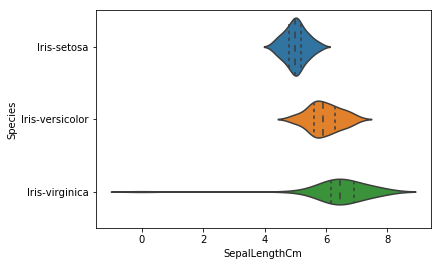

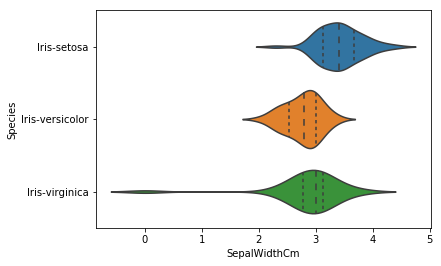

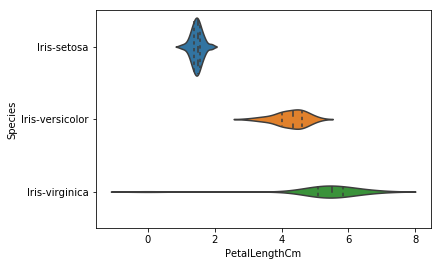

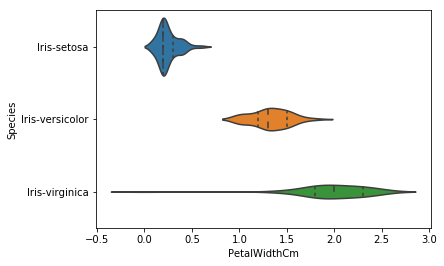

In [36]:
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
import numpy as np
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import os
import matplotlib.pyplot as pl
import matplotlib.pyplot as plt
import seaborn as sns
#Distribution of ‘Species' 
tmp = df.drop('Id', axis=1)
#g = sns.pairplot(tmp, hue='Species', markers='+')
#plt.show()
SepalLengthCm = sns.violinplot(y='Species', x='SepalLengthCm', data=df, inner='quartile')
plt.show()
SepalWidthCm = sns.violinplot(y='Species', x='SepalWidthCm', data=df, inner='quartile')
plt.show()
PetalLengthCm = sns.violinplot(y='Species', x='PetalLengthCm', data=df, inner='quartile')
plt.show()
PetalWidthCm = sns.violinplot(y='Species', x='PetalWidthCm', data=df, inner='quartile')
plt.show()

In [38]:
#Create 3 DataFrame for each Species
setosa=df[df["Species"]=='Iris-setosa']
versicolor =df[df["Species"]=='Iris-versicolor']
virginica =df[df["Species"]=='Iris-virginica']

print("Iris-setosa",setosa.describe())
print("Iris-versicolor",versicolor.describe())
print("Iris-virginica",virginica.describe())


Iris-setosa              Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000
Iris-versicolor               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.326000
std     14.57738       0.516171      0.313798       0.469911      0.197753
min   

<Figure size 432x288 with 0 Axes>

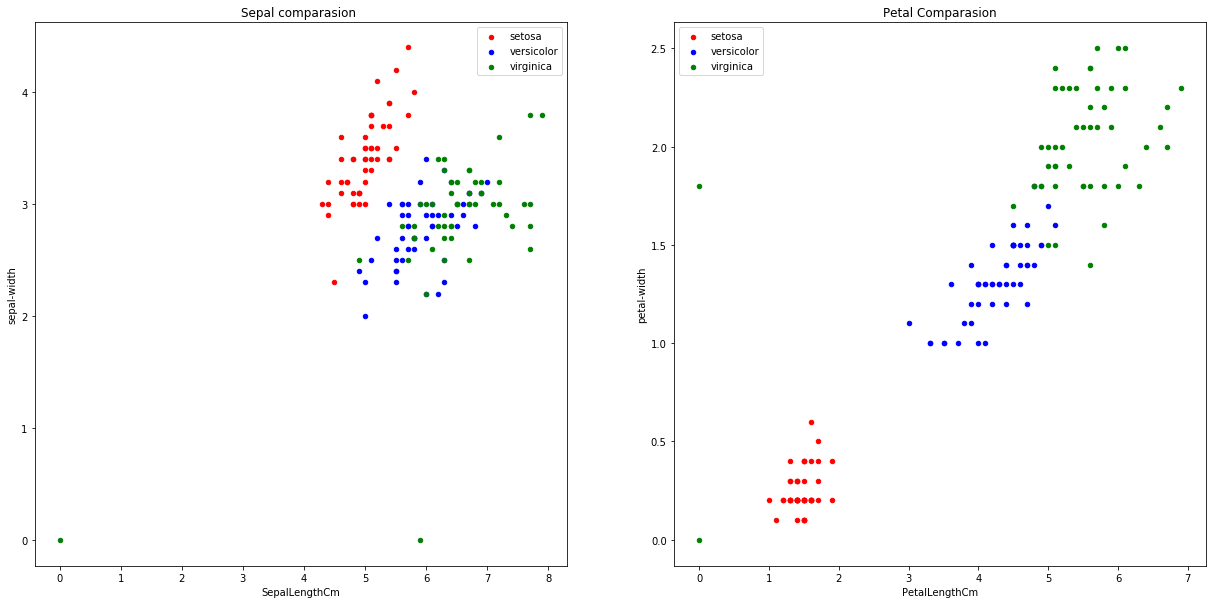

In [52]:
#for each Species ,let's check what is petal and sepal distributuon
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(21, 10))

setosa.plot(x="SepalLengthCm", y="SepalWidthCm", kind="scatter",ax=ax[0],label='setosa',color='r')
versicolor.plot(x="SepalLengthCm",y="SepalWidthCm",kind="scatter",ax=ax[0],label='versicolor',color='b')
virginica.plot(x="SepalLengthCm", y="SepalWidthCm", kind="scatter", ax=ax[0], label='virginica', color='g')

setosa.plot(x="PetalLengthCm", y="PetalWidthCm", kind="scatter",ax=ax[1],label='setosa',color='r')
versicolor.plot(x="PetalLengthCm",y="PetalWidthCm",kind="scatter",ax=ax[1],label='versicolor',color='b')
virginica.plot(x="PetalLengthCm", y="PetalWidthCm", kind="scatter", ax=ax[1], label='virginica', color='g')

ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()
# plt.show()
# plt.close()

#satosa   - satosa Petal are relatively smaller than rest of species .can be easily separable from rest of Species 
#versicolor & virginica are also separable in Petal comprasion
#satoa sepal are smallest in length and largest in Width than other species

### Plot the distribution of target variable using histogram

<Figure size 432x288 with 0 Axes>

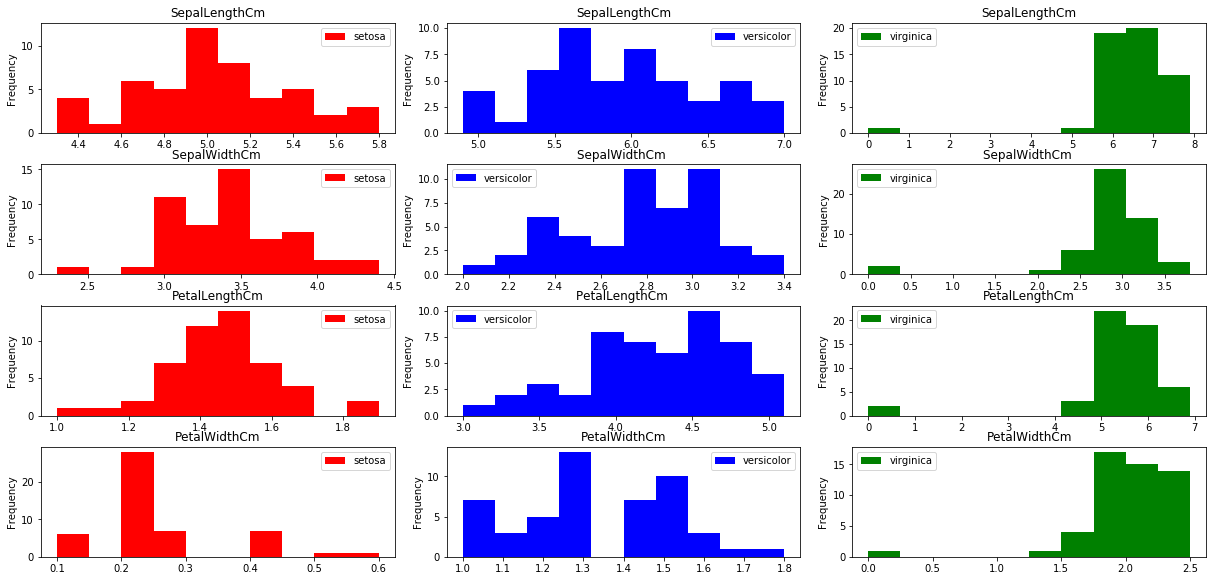

In [39]:
##############################Histogram# Plot all feature for all species###########################################################################
plt.figure()

fig,ax=plt.subplots(4,3,figsize=(17, 8))
setosa["SepalLengthCm"].plot(kind="hist", ax=ax[0][0],label="setosa",color ='r',fontsize=10)
versicolor["SepalLengthCm"].plot(kind="hist", ax=ax[0][1],label="versicolor",color='b',fontsize=10)
virginica["SepalLengthCm"].plot( kind="hist",ax=ax[0][2],label="virginica",color='g',fontsize=10)

setosa["SepalWidthCm"].plot(kind="hist", ax=ax[1][0],label="setosa",color ='r',fontsize=10)
versicolor["SepalWidthCm"].plot(kind="hist", ax=ax[1][1],label="versicolor",color='b',fontsize=10)
virginica["SepalWidthCm"].plot( kind="hist",ax=ax[1][2],label="virginica",color='g',fontsize=10)

setosa["PetalLengthCm"].plot(kind="hist", ax=ax[2][0],label="setosa",color ='r',fontsize=10)
versicolor["PetalLengthCm"].plot(kind="hist", ax=ax[2][1],label="versicolor",color='b',fontsize=10)
virginica["PetalLengthCm"].plot( kind="hist",ax=ax[2][2],label="virginica",color='g',fontsize=10)


setosa["PetalWidthCm"].plot(kind="hist", ax=ax[3][0],label="setosa",color ='r',fontsize=10)
versicolor["PetalWidthCm"].plot(kind="hist", ax=ax[3][1],label="versicolor",color='b',fontsize=10)
virginica["PetalWidthCm"].plot( kind="hist",ax=ax[3][2],label="virginica",color='g',fontsize=10)

plt.rcParams.update({'font.size': 10})
plt.tight_layout()

ax[0][0].set(title='SepalLengthCm')
ax[0][1].set(title='SepalLengthCm')
ax[0][2].set(title='SepalLengthCm')
ax[1][0].set(title='SepalWidthCm ')
ax[1][1].set(title='SepalWidthCm ')
ax[1][2].set(title='SepalWidthCm ')
ax[2][0].set(title='PetalLengthCm')
ax[2][1].set(title='PetalLengthCm ')
ax[2][2].set(title='PetalLengthCm')
ax[3][0].set(title='PetalWidthCm')
ax[3][1].set(title='PetalWidthCm')
ax[3][2].set(title='PetalWidthCm')

ax[0][0].legend()
ax[0][1].legend()
ax[0][2].legend()
ax[1][0].legend()
ax[1][1].legend()
ax[1][2].legend()
ax[2][0].legend()
ax[2][1].legend()
ax[2][2].legend()
ax[3][0].legend()
ax[3][1].legend()
ax[3][2].legend()


plt.show()
plt.close()


### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

<Figure size 432x288 with 0 Axes>

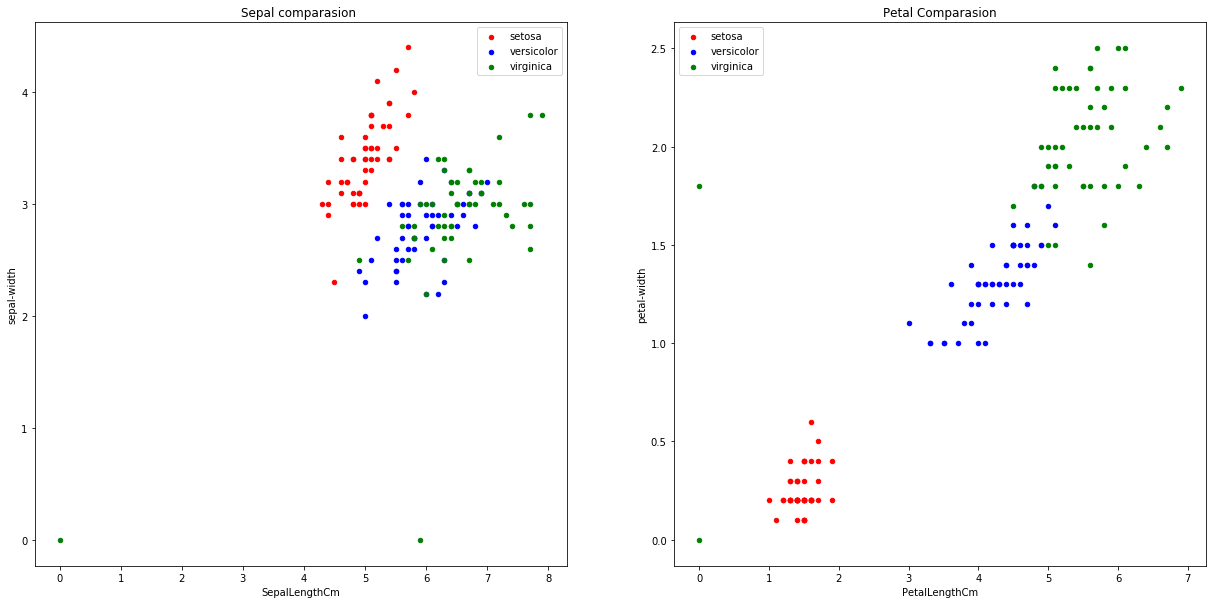

In [40]:
#for each Species ,let's check what is petal and sepal distributuon
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(21, 10))

setosa.plot(x="SepalLengthCm", y="SepalWidthCm", kind="scatter",ax=ax[0],label='setosa',color='r')
versicolor.plot(x="SepalLengthCm",y="SepalWidthCm",kind="scatter",ax=ax[0],label='versicolor',color='b')
virginica.plot(x="SepalLengthCm", y="SepalWidthCm", kind="scatter", ax=ax[0], label='virginica', color='g')

setosa.plot(x="PetalLengthCm", y="PetalWidthCm", kind="scatter",ax=ax[1],label='setosa',color='r')
versicolor.plot(x="PetalLengthCm",y="PetalWidthCm",kind="scatter",ax=ax[1],label='versicolor',color='b')
virginica.plot(x="PetalLengthCm", y="PetalWidthCm", kind="scatter", ax=ax[1], label='virginica', color='g')

ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()
# plt.show()
# plt.close()

#satosa   - satosa Petal are relatively smaller than rest of species .can be easily separable from rest of Species 
#versicolor & virginica are also separable in Petal comprasion
#satoa sepal are smallest in length and largest in Width than other species

### Summary Statistics and explain insights for at least 2 variables

In [ ]:
print(df.describe().transpose())


<Figure size 432x288 with 0 Axes>

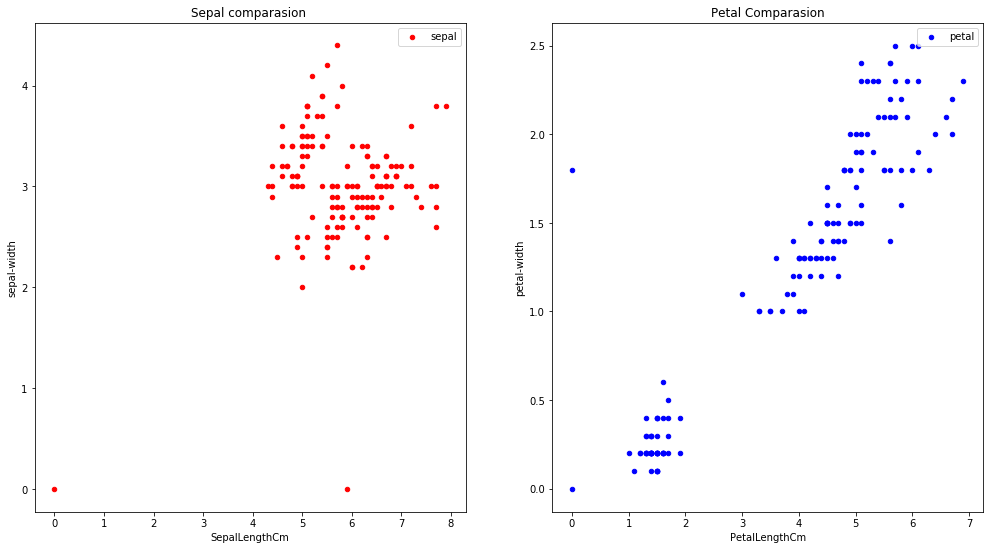

In [41]:
#Plotting Petal Length vs Petal Width & Sepal Length vs Sepal width
#warnings.simplefilter("ignore")#Supress any warning
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(17, 9))
df.plot(x="SepalLengthCm",y="SepalWidthCm",kind="scatter",ax=ax[0],sharex=False,sharey=False,label="sepal",color='r')
df.plot(x="PetalLengthCm",y="PetalWidthCm",kind="scatter",ax=ax[1],sharex=False,sharey=False,label="petal",color='b')
ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()
# plt.show()
# plt.close()



In [ ]:
#count tells that all the 4 features have 150 rows
#in general ,From Mean we can say that sepal is larger than petal.
# we can see that  there are some petals which are smaller than rest of petal.

### Correlation among all variables and give your insights

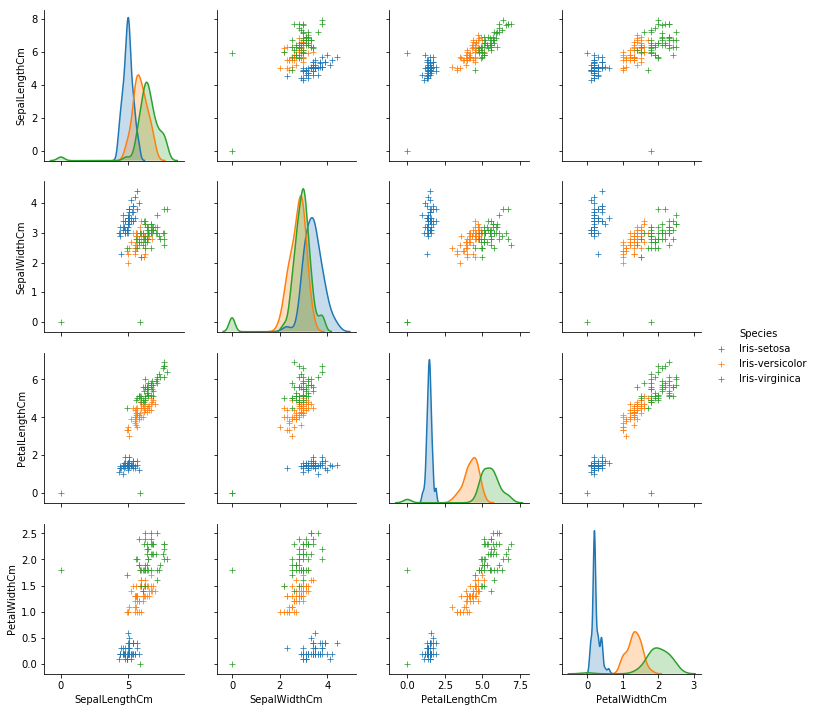

In [42]:
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

In [43]:
corr = df.corr()
corr

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.539500,-0.427175,0.793490,0.864447
SepalLengthCm,0.539500,1.000000,0.145802,0.816560,0.668652
SepalWidthCm,-0.427175,0.145802,1.000000,-0.167316,-0.246073
PetalLengthCm,0.793490,0.816560,-0.167316,1.000000,0.936151
PetalWidthCm,0.864447,0.668652,-0.246073,0.936151,1.000000


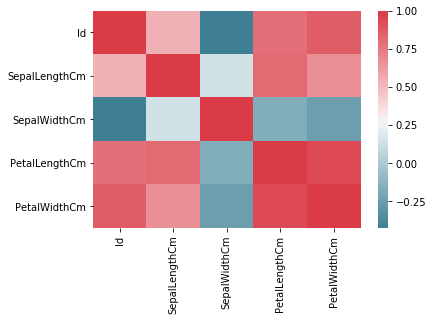

In [44]:
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
#Interpretation :a high positive correlation between PetalWidth and PetalLength (0.96)
#a high positive correlation between PetalLength and SepalLength (0.87)
#a high positive correlation between PetalWidth and SepalLength (0.81)
#We observe correlations between these main attributes: PetalWidth, PetalLength and SepalLength.")


### Split data in Training and Validation in 80:20

In [45]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

### Do Feature Scaling

In [46]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


### Train and Fit NaiveBayes Model

In [47]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)
print(y_pred)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica']


In [49]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([['Iris-setosa', 'Iris-setosa'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica']], dtype=object)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [50]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0  8  0]
 [ 0  0 10]]


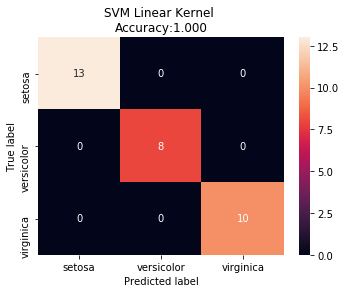

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

clf = SVC(kernel = 'linear').fit(X_train,y_train)
clf.predict(X_train)
y_pred = clf.predict(X_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()